In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st



In [8]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [9]:
cat_school_data = pd.read_csv('cat_school_data.csv', delimiter=';')
num_school_data = pd.read_csv('num_school_data.csv', delimiter=';')
cat_student_data = pd.read_csv('cat_student_data.csv', delimiter=';')
num_student_data = pd.read_csv('num_student_data.csv', delimiter=';')

# DF do cat school

In [11]:
dfcatschool = (
    cat_school_data.drop_duplicates()
    .pivot(index='school', columns='variable', values='value')
)

# DF do cat student

In [12]:
dfcatstudent = (
    cat_student_data.drop_duplicates()
    .pivot_table(
        index=['school', 'student'], 
        columns='variable', 
        values='value', 
        aggfunc='first'
    )
    .fillna('NA')  
)

# Identificar e remover duplicatas em num_student_data

In [13]:
num_student_data_unique = num_student_data.drop_duplicates(
    subset=['school', 'student', 'variable'], keep='first'
)  


In [14]:
dfnumstudent = num_student_data_unique.pivot(
    index=['school', 'student'], columns='variable', values='value'
).reset_index()  

In [15]:
dfnumstudent.head(10)

variable,school,student,normexam,standLRT
0,1,NaN,"1,5061852","0,5364082"
1,1,1.0,"1,5061852","0,7843622"
2,1,4.0,"-0,555112","-1,03397"
3,1,6.0,"-1,335315","-0,951318"
4,1,7.0,"-0,555112","-2,356393"
5,1,13.0,"-0,197611","-0,290107"
6,1,14.0,"-0,197611","0,0404992"
7,1,16.0,"2,3136012","0,7843622"
8,1,17.0,"-0,062088","-0,703364"
9,1,19.0,"-0,939378","-0,372758"


# Renomear a coluna 'variable' para 'schvag'


In [16]:
num_school_data = num_school_data.rename(columns={'variable': 'schvag'})


# Converter a coluna 'value' para numérico, substituindo vírgulas por pontos


In [17]:
num_school_data['schavg'] = pd.to_numeric(num_school_data['value'].astype(str).str.replace(',', '.', regex=False), errors='coerce')


# Remover duplicatas de num_school_data


In [18]:
dfnumschool = num_school_data.drop_duplicates()


# Redefinir o índice para incluir a coluna 'school'


In [19]:
dfnumschool = dfnumschool.reset_index()


# Selecionar apenas as colunas 'school' e 'schavg'


In [20]:
dfnumschool = dfnumschool[['school', 'schavg']]


# Juntando dos dataframes

In [21]:
dfschool = pd.merge(dfnumschool, dfcatschool, on="school", how="left")
dfstudent = pd.merge(dfnumstudent, dfcatstudent, on=["school", "student"], how="left")
dfcompleto = pd.merge(dfstudent, dfschool, on="school", how="left")


In [22]:
dfcompleto.head(15)

,school,student,normexam,standLRT,intake,sex,vr,schavg,schgend,type
0,1,NaN,"1,5061852","0,5364082",NaN,NaN,NaN,0.166175,mixed,Mxd
1,1,1.0,"1,5061852","0,7843622",bottom 25%,F,mid 50%,0.166175,mixed,Mxd
2,1,4.0,"-0,555112","-1,03397",mid 50%,F,mid 50%,0.166175,mixed,Mxd
3,1,6.0,"-1,335315","-0,951318",mid 50%,M,mid 50%,0.166175,mixed,Mxd
4,1,7.0,"-0,555112","-2,356393",top 25%,M,mid 50%,0.166175,mixed,Mxd
5,1,13.0,"-0,197611","-0,290107",mid 50%,M,mid 50%,0.166175,mixed,Mxd
6,1,14.0,"-0,197611","0,0404992",mid 50%,M,mid 50%,0.166175,mixed,Mxd
7,1,16.0,"2,3136012","0,7843622",bottom 25%,F,mid 50%,0.166175,mixed,Mxd
8,1,17.0,"-0,062088","-0,703364",mid 50%,F,mid 50%,0.166175,mixed,Mxd
9,1,19.0,"-0,939378","-0,372758",mid 50%,NA,mid 50%,0.166175,mixed,Mxd


# Verificando se a coluna 'student' existe após o merge e excluindo linhas com valores NA na mesma coluna.

In [23]:
if "student" in dfcompleto.columns:
    dfcompleto = dfcompleto.dropna(subset=["student"])
else:
    print("A coluna 'student' não foi encontrada em dfcompleto.")

In [24]:
dfcompleto.head(15)

,school,student,normexam,standLRT,intake,sex,vr,schavg,schgend,type
1,1,1.0,"1,5061852","0,7843622",bottom 25%,F,mid 50%,0.166175,mixed,Mxd
2,1,4.0,"-0,555112","-1,03397",mid 50%,F,mid 50%,0.166175,mixed,Mxd
3,1,6.0,"-1,335315","-0,951318",mid 50%,M,mid 50%,0.166175,mixed,Mxd
4,1,7.0,"-0,555112","-2,356393",top 25%,M,mid 50%,0.166175,mixed,Mxd
5,1,13.0,"-0,197611","-0,290107",mid 50%,M,mid 50%,0.166175,mixed,Mxd
6,1,14.0,"-0,197611","0,0404992",mid 50%,M,mid 50%,0.166175,mixed,Mxd
7,1,16.0,"2,3136012","0,7843622",bottom 25%,F,mid 50%,0.166175,mixed,Mxd
8,1,17.0,"-0,062088","-0,703364",mid 50%,F,mid 50%,0.166175,mixed,Mxd
9,1,19.0,"-0,939378","-0,372758",mid 50%,NA,mid 50%,0.166175,mixed,Mxd
10,1,22.0,"0,4781942","-0,290107",mid 50%,M,mid 50%,0.166175,mixed,Mxd


 # Convertendo colunas para string antes de excluir linhas com valores "NULL" nas colunas especificadas


In [376]:
for col in ["intake", "sex", "vr", "schgend", "schavg", "standLRT", "normexam", "type"]:
    if col in dfcompleto.columns:
        dfcompleto[col] = dfcompleto[col].astype(str)
        dfcompleto = dfcompleto[~dfcompleto[col].str.contains("NULL", na=False)]
    else:
        print(f"A coluna '{col}' não foi encontrada em dfcompleto.")


In [25]:
dfcompleto.head(10)


,school,student,normexam,standLRT,intake,sex,vr,schavg,schgend,type
1,1,1.0,"1,5061852","0,7843622",bottom 25%,F,mid 50%,0.166175,mixed,Mxd
2,1,4.0,"-0,555112","-1,03397",mid 50%,F,mid 50%,0.166175,mixed,Mxd
3,1,6.0,"-1,335315","-0,951318",mid 50%,M,mid 50%,0.166175,mixed,Mxd
4,1,7.0,"-0,555112","-2,356393",top 25%,M,mid 50%,0.166175,mixed,Mxd
5,1,13.0,"-0,197611","-0,290107",mid 50%,M,mid 50%,0.166175,mixed,Mxd
6,1,14.0,"-0,197611","0,0404992",mid 50%,M,mid 50%,0.166175,mixed,Mxd
7,1,16.0,"2,3136012","0,7843622",bottom 25%,F,mid 50%,0.166175,mixed,Mxd
8,1,17.0,"-0,062088","-0,703364",mid 50%,F,mid 50%,0.166175,mixed,Mxd
9,1,19.0,"-0,939378","-0,372758",mid 50%,NA,mid 50%,0.166175,mixed,Mxd
10,1,22.0,"0,4781942","-0,290107",mid 50%,M,mid 50%,0.166175,mixed,Mxd


# Verificando uma problemática com a coluna normexam por conta dos valores nulos, a coluna estava sumindo

In [26]:
print(dfcompleto['normexam'].astype(str).str.contains('NULL').all())


False


# Problema na coluna standLRT, valores da coluna estavam sumindo

In [27]:
non_numeric_values = dfcompleto[pd.to_numeric(dfcompleto['standLRT'], errors='coerce').isna()]['standLRT'].unique()
print(non_numeric_values)

['0,7843622' '-1,03397' '-0,951318' '-2,356393' '-0,290107' '0,0404992'
 '-0,703364' '-0,372758' '0,1231502' '0,6190592' '0,2884532' '0,8670142'
 '-0,124804' '-1,281924' '0,4537562' '1,2802712' '-0,868667' '0,3711052'
 '1,6935282' '0,2058022' '-0,042152' '1,6108772' '-0,620713' '1,1976192'
 '2,4373912' '-1,447227' '-0,538061' '2,5200432' '2,1067862' '-1,364576'
 '2,1894372' '-1,116621' '1,1149682' '2,0241342' '1,0323172' '-1,199273'
 '-0,45541' '-1,695182' '1,9414832' '1,3629222' '0,7017112' '0,9496652'
 '-0,786016' '1,8588312' '0,5364082' '1,4455742' '-1,860484' '-0,207455'
 '2,2720892' '1,5282252' '2,3547402' '1,7761802' '-1,777833' '-1,943136'
 nan '3,0159522' '2,8506492' '-2,439045' '-2,025787' '-2,19109'
 '-2,273742' '-2,934953' '-2,686999' '-1,61253' '-2,108439' '-1,529879'
 '-2,604348' '-2,521696' '-2,76965' '-2,852302' '2,9333002']


In [55]:
print(dfcompleto['standLRT'].head())


1    0.784362
2   -1.033970
3   -0.951318
4   -2.356393
5   -0.290107
Name: standLRT, dtype: float64


In [29]:
dfcompleto.head()

,school,student,normexam,standLRT,intake,sex,vr,schavg,schgend,type
1,1,1.0,"1,5061852","0,7843622",bottom 25%,F,mid 50%,0.166175,mixed,Mxd
2,1,4.0,"-0,555112","-1,03397",mid 50%,F,mid 50%,0.166175,mixed,Mxd
3,1,6.0,"-1,335315","-0,951318",mid 50%,M,mid 50%,0.166175,mixed,Mxd
4,1,7.0,"-0,555112","-2,356393",top 25%,M,mid 50%,0.166175,mixed,Mxd
5,1,13.0,"-0,197611","-0,290107",mid 50%,M,mid 50%,0.166175,mixed,Mxd


# Convertendo colunas para os tipos corretos


# No normexam tem um valor que não pode ser convertido para número devido ao uso da vírgula, irei substituir por ponto para facilitar 

In [30]:
dfcompleto['normexam'] = dfcompleto['normexam'].astype(str).str.replace(',', '.', regex=False)  # Substituindo vírgulas por pontos
dfcompleto['normexam'] = pd.to_numeric(dfcompleto['normexam'], errors='coerce')

In [58]:
print(dfcompleto['normexam'].head())


1    1.506185
2   -0.555112
3   -1.335315
4   -0.555112
5   -0.197611
Name: normexam, dtype: float64


# No standLRT tem um valor que não pode ser convertido para número devido ao uso da vírgula, irei substituir por ponto para facilitar

In [32]:
dfcompleto['standLRT'] = dfcompleto['standLRT'].astype(str)


# Substituição das vírgulas por pontos na coluna `standLRT`


In [33]:
dfcompleto['standLRT'] = dfcompleto['standLRT'].str.replace(',', '.', regex=False)


# Converter a coluna `standLRT` para numérico


In [34]:
dfcompleto['standLRT'] = pd.to_numeric(dfcompleto['standLRT'], errors='coerce')


In [35]:
print(dfcompleto['standLRT'].head())


1       0.784362
2      -1.033970
3      -0.951318
4      -2.356393
5      -0.290107
6       0.040499
7       0.784362
8      -0.703364
9      -0.372758
10     -0.290107
11      0.123150
12      0.619059
13      0.288453
14     -0.290107
15      0.784362
16      0.867014
17     -0.124804
18     -1.281924
19      0.453756
20      1.280271
21     -0.868667
22      0.867014
23      0.371105
24      1.693528
25      0.205802
26     -0.290107
27     -0.042152
28      0.371105
29      1.610877
30      0.371105
31     -0.620713
32      1.197619
33     -0.620713
34      1.610877
35      1.610877
36      2.437391
37     -1.447227
38     -1.033970
39     -0.538061
40      2.520043
41      1.197619
42      0.040499
43      2.106786
44      0.371105
45      0.205802
46     -1.364576
47      0.619059
48      0.205802
49      2.189437
50     -1.116621
51      1.114968
52     -0.620713
53      2.024134
54      0.040499
55      0.619059
56      1.032317
57      0.371105
58      0.288453
59     -0.1248

# Convertendo colunas para string


In [36]:
dfcompleto['sex'] = dfcompleto['sex'].astype(str)
dfcompleto['intake'] = dfcompleto['intake'].astype(str)
dfcompleto['vr'] = dfcompleto['vr'].astype(str)


# Verificando a conversão se deu certo 

In [37]:
print(dfcompleto.dtypes)  
print(dfcompleto[['sex', 'intake', 'vr']].head())

school        int64
student     float64
normexam    float64
standLRT    float64
intake       object
sex          object
vr           object
schavg      float64
schgend      object
type         object
dtype: object
  sex      intake       vr
1   F  bottom 25%  mid 50%
2   F     mid 50%  mid 50%
3   M     mid 50%  mid 50%
4   M     top 25%  mid 50%
5   M     mid 50%  mid 50%


In [38]:
dfcompleto.head(10)

,school,student,normexam,standLRT,intake,sex,vr,schavg,schgend,type
1,1,1.0,1.506185,0.784362,bottom 25%,F,mid 50%,0.166175,mixed,Mxd
2,1,4.0,-0.555112,-1.033970,mid 50%,F,mid 50%,0.166175,mixed,Mxd
3,1,6.0,-1.335315,-0.951318,mid 50%,M,mid 50%,0.166175,mixed,Mxd
4,1,7.0,-0.555112,-2.356393,top 25%,M,mid 50%,0.166175,mixed,Mxd
5,1,13.0,-0.197611,-0.290107,mid 50%,M,mid 50%,0.166175,mixed,Mxd
6,1,14.0,-0.197611,0.040499,mid 50%,M,mid 50%,0.166175,mixed,Mxd
7,1,16.0,2.313601,0.784362,bottom 25%,F,mid 50%,0.166175,mixed,Mxd
8,1,17.0,-0.062088,-0.703364,mid 50%,F,mid 50%,0.166175,mixed,Mxd
9,1,19.0,-0.939378,-0.372758,mid 50%,NA,mid 50%,0.166175,mixed,Mxd
10,1,22.0,0.478194,-0.290107,mid 50%,M,mid 50%,0.166175,mixed,Mxd


In [39]:
print(cat_student_data['value'].unique())  


['bottom 25%' 'mid 50%' 'top 25%' 'F' 'M']


# Verificar valores únicos na coluna 'sex'

In [40]:
print(dfcompleto['sex'].unique())


['F' 'M' 'NA']


# Substituindo de NA para Unknown 

In [41]:
dfcompleto['sex'] = dfcompleto['sex'].replace(['', 'NA', 'NaN', None, 'nan'], 'Unknown')


In [42]:
print(dfcompleto['sex'].unique())

['F' 'M' 'Unknown']


In [43]:
dfcompleto['sex']

1             F
2             F
3             M
4             M
5             M
6             M
7             F
8             F
9       Unknown
10            M
11            M
12            M
13            M
14            F
15            M
16            M
17            M
18            M
19            M
20            F
21            F
22            M
23            M
24            M
25            M
26            F
27            F
28            F
29            F
30            F
31            M
32            F
33            F
34            M
35            F
36            M
37            M
38            M
39            F
40            M
41            M
42            M
43            M
44            F
45            F
46            M
47            F
48            F
49            M
50            M
51            M
52            M
53            M
54            M
55            F
56            M
57            M
58            M
59            M
60            M
61            F
62            F
63      

In [45]:
dfcompleto.head(15)

,school,student,normexam,standLRT,intake,sex,vr,schavg,schgend,type
1,1,1.0,1.506185,0.784362,bottom 25%,F,mid 50%,0.166175,mixed,Mxd
2,1,4.0,-0.555112,-1.033970,mid 50%,F,mid 50%,0.166175,mixed,Mxd
3,1,6.0,-1.335315,-0.951318,mid 50%,M,mid 50%,0.166175,mixed,Mxd
4,1,7.0,-0.555112,-2.356393,top 25%,M,mid 50%,0.166175,mixed,Mxd
5,1,13.0,-0.197611,-0.290107,mid 50%,M,mid 50%,0.166175,mixed,Mxd
6,1,14.0,-0.197611,0.040499,mid 50%,M,mid 50%,0.166175,mixed,Mxd
7,1,16.0,2.313601,0.784362,bottom 25%,F,mid 50%,0.166175,mixed,Mxd
8,1,17.0,-0.062088,-0.703364,mid 50%,F,mid 50%,0.166175,mixed,Mxd
9,1,19.0,-0.939378,-0.372758,mid 50%,Unknown,mid 50%,0.166175,mixed,Mxd
10,1,22.0,0.478194,-0.290107,mid 50%,M,mid 50%,0.166175,mixed,Mxd


In [46]:
describe_numerics = dfcompleto.describe(include=[np.number]).round(2)
print(describe_numerics)

        school  student  normexam  standLRT   schavg
count  4010.00  4010.00   3939.00   3981.00  4010.00
mean     30.92   134.30      0.00      0.01     0.00
std      18.93   174.55      1.00      0.99     0.32
min       1.00     1.00     -3.67     -2.93    -0.76
25%      14.00    39.00     -0.70     -0.62    -0.15
50%      29.00    78.00      0.00      0.04    -0.02
75%      47.00   138.00      0.68      0.62     0.27
max      65.00   913.00      3.67      3.02     0.64


In [47]:
dfcompleto.value_counts()

school  student  normexam   standLRT   intake      sex      vr          schavg     schgend  type
1       1.0       1.506185   0.784362  bottom 25%  F        mid 50%      0.166175  mixed    Mxd     1
41      868.0     0.747228   0.371105  bottom 25%  F        mid 50%     -0.288729  girls    Sngl    1
        872.0     0.328072   0.867014  bottom 25%  F        mid 50%     -0.288729  girls    Sngl    1
        873.0    -0.555112  -1.447227  top 25%     F        mid 50%     -0.288729  girls    Sngl    1
        878.0     0.544341  -0.538061  NA          F        mid 50%     -0.288729  girls    Sngl    1
        880.0     0.328072   0.040499  mid 50%     F        mid 50%     -0.288729  girls    Sngl    1
42      1.0      -0.197611   0.205802  mid 50%     F        mid 50%     -0.146179  mixed    Mxd     1
        2.0      -0.492781   0.453756  mid 50%     M        mid 50%     -0.146179  mixed    Mxd     1
        3.0       0.134067  -0.042152  mid 50%     F        mid 50%     -0.146179  mixe

# Verificando a contagem

In [48]:
distinct_count_all = dfcompleto.nunique()


In [49]:
distinct_count_all

school       65
student     646
normexam     71
standLRT     70
intake        4
sex           3
vr            4
schavg       65
schgend       3
type          2
dtype: int64

# Análise exploratória de dados

In [50]:
grouped_summary = dfcompleto.groupby('schgend')['normexam'].describe().round(3)
grouped_summary

,count,mean,std,min,25%,50%,75%,max
schgend,,,,,,,,
boys,503.0,0.019,1.054,-2.753,-0.700,0.074,0.747,2.532
girls,1339.0,0.154,0.984,-3.060,-0.493,0.134,0.747,3.666
mixed,2097.0,-0.097,0.980,-3.666,-0.776,-0.129,0.544,2.925


# Nota-se que de acordo com a media (mean) os colégios unicamente femininos apresentam uma média da nota do exame maior, em seguida do colégio unicamente masculinos e de pior desempenho os das escolas mistas

C:\Users\hiago\AppData\Local\Temp\ipykernel_28040\620430559.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='schgend', y='normexam', data=dfcompleto, palette='pastel')


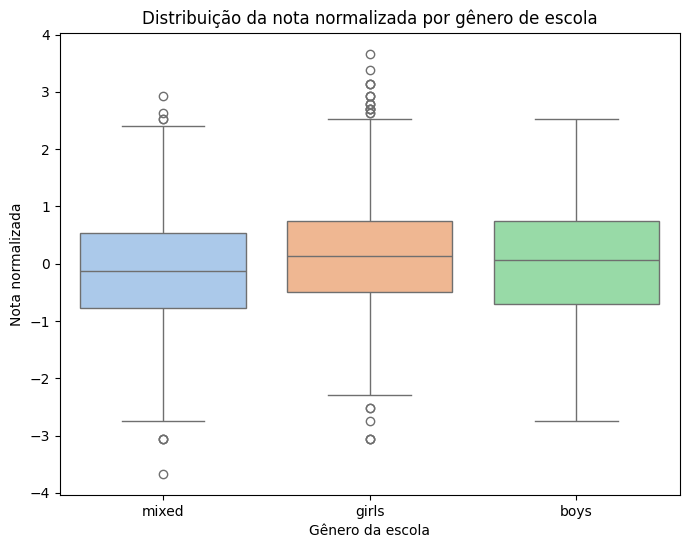

In [51]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='schgend', y='normexam', data=dfcompleto, palette='pastel')
plt.title('Distribuição da nota normalizada por gênero de escola')
plt.xlabel('Gênero da escola')
plt.ylabel('Nota normalizada')
plt.show()

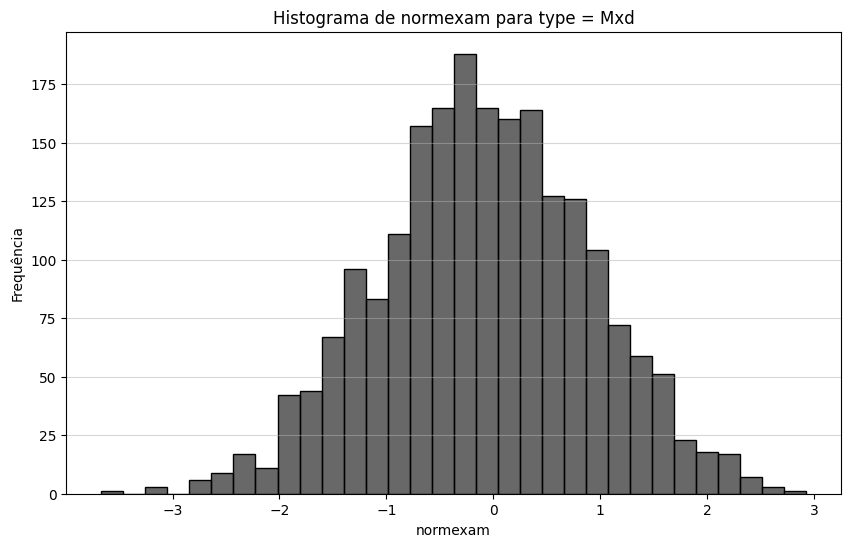

In [52]:
df_filtrado = dfcompleto[dfcompleto['type'] == 'Mxd']
plt.figure(figsize=(10, 6)) 
sns.histplot(data=df_filtrado, x='normexam', color='#363636', edgecolor='black')  
plt.title('Histograma de normexam para type = Mxd') 
plt.xlabel('normexam')
plt.ylabel('Frequência')
plt.grid(axis='y', alpha=0.5) 
plt.show()

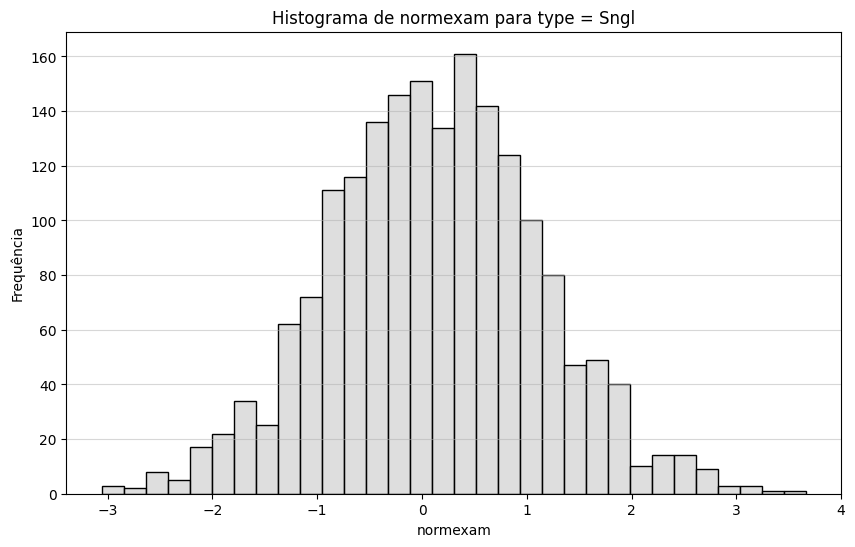

In [53]:
df_filtrado = dfcompleto[dfcompleto['type'] == 'Sngl']
plt.figure(figsize=(10, 6)) 
sns.histplot(data=df_filtrado, x='normexam', color='#D3D3D3', edgecolor='black')
# Personalizando o gráfico
plt.title('Histograma de normexam para type = Sngl')
plt.xlabel('normexam')
plt.ylabel('Frequência')
plt.grid(axis='y', alpha=0.5) 
plt.show()



## Escolas separadas por sexo apresentam desempenho acadêmico mais homogêneo, com menor dispersão de notas em comparação com escolas mistas, indicando um ambiente de aprendizado mais focado e propício ao desenvolvimento individual.

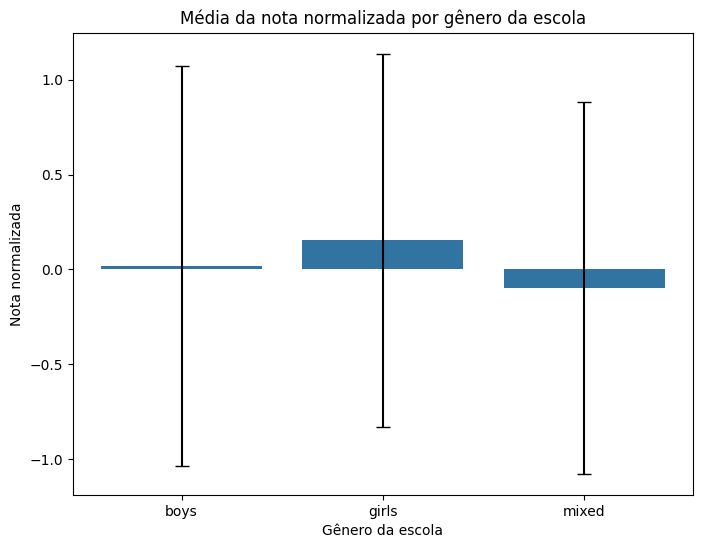

In [54]:
summary_stats = dfcompleto.groupby('schgend')['normexam'].agg(['mean', 'std'])
plt.figure(figsize=(8, 6))
sns.barplot(x=summary_stats.index, y=summary_stats['mean'])
plt.errorbar(x=summary_stats.index, y=summary_stats['mean'], yerr=summary_stats['std'], fmt='none', ecolor='black', capsize=5)

plt.title('Média da nota normalizada por gênero da escola')
plt.xlabel('Gênero da escola')
plt.ylabel('Nota normalizada')
plt.show()

## As meninas tendem a ter um desempenho médio melhor do que os meninos e os alunos de escolas mistas.
## As escolas só para meninas apresentam um desempenho mais homogêneo, com menor variação nas notas, em comparação com as escolas mistas e as escolas só para meninos.
## As escolas mistas e as escolas só para meninos apresentam uma variação similar nas notas, embora as escolas mistas tenham uma média ligeiramente superior.